In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

from sklearn import svm
import matplotlib.pyplot as plt

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [3]:
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv("/content/drive/MyDrive/NLMH_Thuchanh/Week11_Thuchanh5/temp.csv")
df.head()

,Length_a,Width_a,Length_b,Width_b,Type
0,5.1,3.5,1.4,0.2,Iris setosa
1,4.9,3.0,1.4,0.2,Iris setosa
2,4.7,3.2,1.3,0.2,Iris setosa
3,4.6,3.1,1.5,0.2,Iris setosa
4,5.0,3.6,1.4,0.2,Iris setosa


In [5]:
from sklearn.preprocessing import LabelEncoder

# Convert species names to categorical codes
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

In [7]:
# Separate data and target values
data = df[['Length_a', 'Width_a', 'Length_b', 'Width_b']].values
target = df['Type'].values

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size=0.2, random_state=0)

In [9]:
# Create a SVM classifier
clf = svm.SVC(C=0.1) 

In [10]:
# Train the classifier with the data
clf.fit(Xtrain, ytrain)

SVC(C=0.1)

In [11]:
#   Bông hoa có độ dài đài hoa 5 cm, độ rộng đài hoa 3.3 cm, 
# độ dài cánh hoa 1.4 cm, độ rộng cánh hoa 0.2 cm (Kết quả: Iris setosa.)
new_data = [[5.0, 3.3, 1.4, 0.2]]
prediction = clf.predict(new_data)

# Print the predicted Iris class
print(le.inverse_transform(prediction))

['Iris setosa']


In [12]:
#   Bông hoa có độ dài đài hoa 5.7 cm, độ rộng đài hoa 2.8 cm, 
# độ dài cánh hoa 4.1 cm, độ rộng cánh hoa 1.3 cm (Kết quả: Iris virginica.)
new_data = [[5.7, 2.8, 4.1, 1.3]]
prediction = clf.predict(new_data)

# Print the predicted Iris class
print(le.inverse_transform(prediction))

['Iris virginica']


In [13]:
#   Bông hoa có độ dài đài hoa 5.9 cm, độ rộng đài hoa 3 cm, 
# độ dài cánh hoa 5.1 cm, độ rộng cánh hoa 1.8 cm (Kết quả: Iris virginica)
new_data = [[5.9, 3, 5.1, 1.8]]
prediction = clf.predict(new_data)

# Print the predicted Iris class
print(le.inverse_transform(prediction))

['Iris virginica']


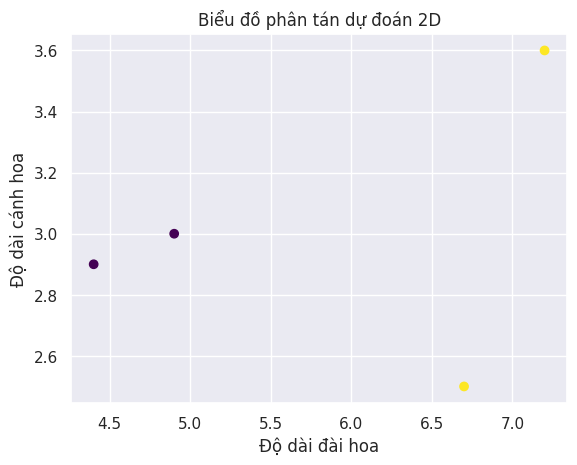

In [14]:
# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred = clf.predict(Xtest)

# Vẽ biểu đồ phân tán 2D
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('Độ dài đài hoa')
plt.ylabel('Độ dài cánh hoa')
plt.title('Biểu đồ phân tán dự đoán 2D')
plt.show()

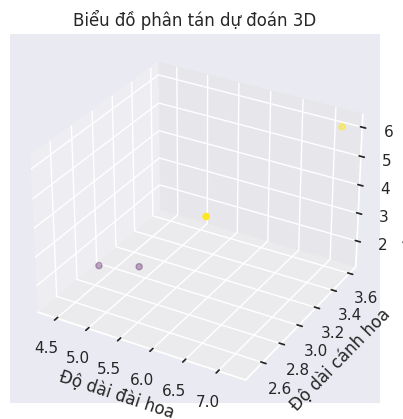

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred = clf.predict(Xtest)

# Vẽ biểu đồ 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xtest[:, 0], Xtest[:, 1], Xtest[:, 2], c=y_pred, cmap='viridis')
ax.set_xlabel('Độ dài đài hoa')
ax.set_ylabel('Độ dài cánh hoa')
ax.set_zlabel('Độ rộng cánh hoa')
ax.set_title('Biểu đồ phân tán dự đoán 3D')
plt.show()
